<a href="https://colab.research.google.com/github/HanaeMoussaoui/License-plate-detection-and-recognition/blob/main/YoloV8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Install required libraries
!pip install ultralytics
!pip install Pillow
!pip install matplotlib

Using device: cpu


Saving eu 1.jpg to eu 1.jpg

image 1/1 /content/eu 1.jpg: 448x640 1 license_plate, 291.0ms
Speed: 9.5ms preprocess, 291.0ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)
Error loading font file: unknown file format


<ipython-input-9-339f027a1003>:57: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_size = draw.textsize(text, font=font)


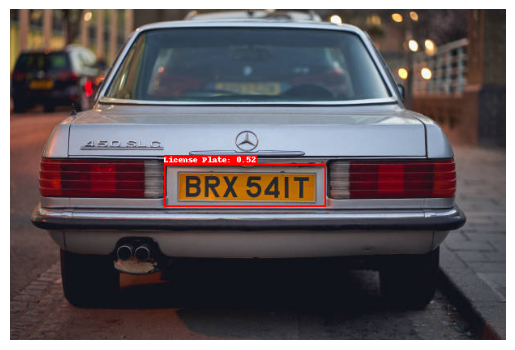

In [9]:
import os
import torch
from ultralytics import YOLO
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Check if CUDA is available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')

# Load YOLOv8 model trained for license plate detection
model = YOLO('YoloV8-License-plate.pt').to(device)  # Replace with your custom-trained model

# Function to upload and display image
from google.colab import files
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
img = Image.open(image_path)
img.show()

# Perform license plate detection
results = model(image_path)

# Display results
result_image = results[0].plot()  # Draw the boxes on the image
result_image = Image.fromarray(result_image)
result_image.show()

# Process and visualize results
boxes = results[0].boxes.xyxy.cpu().numpy() if results[0].boxes else np.array([])
scores = results[0].boxes.conf.cpu().numpy() if results[0].boxes else np.array([])
labels = results[0].boxes.cls.cpu().numpy() if results[0].boxes else np.array([])

# Load the image with PIL
image = Image.open(image_path)
draw = ImageDraw.Draw(image)

# Download a font file
font_path = "/tmp/DejaVuSans-Bold.ttf"  # Path to the downloaded font file
if not os.path.exists(font_path):
    !wget https://github.com/dcoeurjo/resources/raw/master/fonts/DejaVuSans-Bold.ttf -O /tmp/DejaVuSans-Bold.ttf

# Load the downloaded truetype font
try:
    font_size = 150  # Set the font size
    font = ImageFont.truetype(font_path, font_size)
except OSError as e:
    print("Error loading font file:", e)

# Draw bounding boxes and labels
for box, score in zip(boxes, scores):
    x1, y1, x2, y2 = map(int, box)
    draw.rectangle([x1, y1, x2, y2], outline="red", width=2)
    text = f'License Plate: {score:.2f}'
    text_size = draw.textsize(text, font=font)
    text_location = (x1, y1 - text_size[1]) if y1 - text_size[1] > 0 else (x1, y1 + 1)
    draw.rectangle([text_location, (text_location[0] + text_size[0], text_location[1] + text_size[1])], fill="red")
    draw.text(text_location, text, fill="white", font=font)

# Convert to RGB for matplotlib display
image = image.convert("RGB")

# Display the image with bounding boxes and labels
plt.imshow(np.array(image))
plt.axis('off')
plt.show()